<a href="https://colab.research.google.com/github/Azmal16/Machine_Learning_Practice/blob/master/ML%20Books/Hands%20on%20ML%20with%20SKL%20and%20TF%20by%20Geron/Chapter_1/Example_1_1_Training_and_running_a_linear_model_using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



###Importing Modules


In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn.linear_model

###Loading Datasets from GitHub

In [42]:
oecd_bli = pd.read_csv('https://raw.githubusercontent.com/Azmal16/Machine_Learning_Practice/master/ML%20Books/Hands%20on%20ML%20with%20SKL%20and%20TF%20by%20Geron/Datasets/Chapter_1/oecd_bli_2015.csv',thousands=',')
gdp_per_capita = pd.read_csv('https://raw.githubusercontent.com/Azmal16/Machine_Learning_Practice/master/ML%20Books/Hands%20on%20ML%20with%20SKL%20and%20TF%20by%20Geron/Datasets/Chapter_1/gdp_per_capita.csv',thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")

###Preparing 'prepare_country_stats' method

In [43]:
#don't worry if you don't get it now. w'll learn it later.

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(
        index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
 
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

###Preparing the data

In [44]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) 
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

###Visualizing the Data

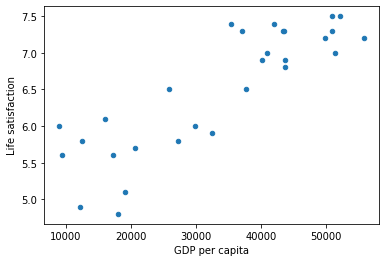

In [45]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction') 
plt.show()

###Selecting a Linear Model

In [46]:
model = sklearn.linear_model.LinearRegression()

###Training the model

In [47]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Visualizing our model

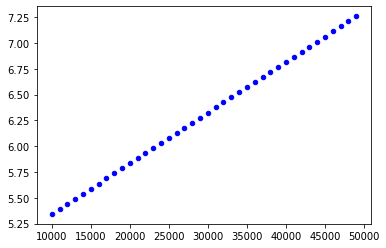

In [48]:
for x in range(10, 50):
    plot_x = 1000 * x
    plot_y = float(model.predict([[plot_x]]))
    plt.scatter(plot_x, plot_y, s=20, color='b')
plt.show()

###Making prediction for Cyprus using Linear Regression

In [49]:
X_new = [[22587]] # Cyprus's GDP per capita 
print(model.predict(X_new))

[[5.96242338]]


###Trying the same with KNN Regression 

In [50]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(
n_neighbors=3)

In [51]:
#Training
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

###Visualization

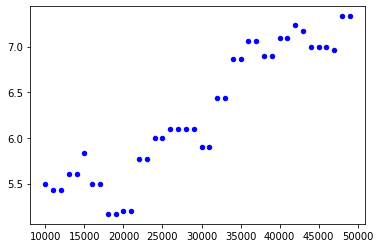

In [52]:
for x in range(10, 50):
    plot_x = 1000 * x
    plot_y = float(model.predict([[plot_x]]))
    plt.scatter(plot_x, plot_y, s=20, color='b')
plt.show()

###Making Prediction for Cyprus using KNN Regression

In [53]:
X_new = [[22587]] # Cyprus's GDP per capita 
print(model.predict(X_new))

[[5.76666667]]
